In [5]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.state_initializer import  init_state_ref,init_state_bpf
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
#import cmath
from cmath import exp
import sympy
def state_generalized_amplitude_damping(theta, phi, p, gamma):
    state = zeros(8,dtype=complex)    
    state[0] = sqrt(p)*cos(theta/2) # 000
    state[1] = sqrt(p*gamma)*exp(1j*phi)*sin(theta/2) # 001
    state[2] = sqrt((1-p)*(1-gamma))*cos(theta/2)#   010
    state[4] = sqrt(p*(1-gamma))*exp(1j*phi)*sin(theta/2) # 100
    state[6] = sqrt(1-p)*exp(1j*phi)*sin(theta/2) #  110
    state[7] = sqrt(1-p)*gamma*cos(theta/2) #  111
    target_op = outer(state.conj(), state)
    target_op = tensor(target_op)
    return target_op


def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    count = 0
    pretrain = True
    n_qubits = 3
    depht = 5
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1

        circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)
        # defina o estado a ser preparado abaixo
        #------------------------------------------------------------
        target_op = state_generalized_amplitude_damping(pi/2, 0, p,1)
        #------------------------------------------------------------
        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 1000)

        pretrain = False
        rho = tomograph(qc, qr)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)

    plots(list_p, coerencias_R, coerencias_L)
    #print(sympy.Matrix(rho))

[0.   0.25 0.5  0.75 1.  ]
0 de 5
1 de 5
2 de 5
3 de 5
4 de 5


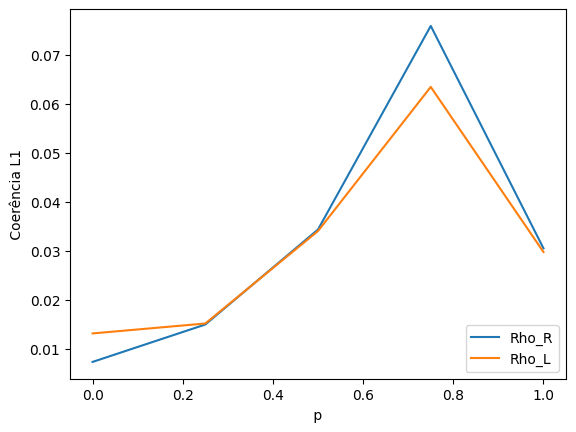

In [6]:
list_p = [0.5]
list_p = np.linspace(0,1,5)
print(list_p)
run_calcs(list_p, 100)